<h1>Auto Regression</h1>
<p>Un processus autorégressif est un modèle de régression pour séries temporelles dans lequel la série est expliquée par ses valeurs passées plutôt que par d'autres variables. <br>Il est exprimée par l'equation suivante<img src= 'img1.png'>
</p>

In [10]:
import pandas as pd 
from matplotlib import pyplot
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
from math import sqrt
%matplotlib inline

In [2]:
#chargement des valeur d'ouverture du TunIndex
d = pd.read_csv('Data.csv')
X = d["Open"]
X.reset_index()
len(X)

733

In [3]:
train, test = X[1:len(X)-15], X[len(X)-15:] #Découpage des valeur en Dest et train Data
train

1      6191.54
2      6258.01
3      6240.59
4      6265.08
5      6313.80
        ...   
713    6645.79
714    6688.35
715    6698.63
716    6714.88
717    6739.41
Name: Open, Length: 717, dtype: float64

In [4]:
#entrainement du modéle de régression : 
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
coef

/home/azseza/.local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning

const       54.897115
L1.Open      1.191929
L2.Open     -0.181806
L3.Open     -0.008544
L4.Open     -0.069463
L5.Open      0.142621
L6.Open     -0.069731
L7.Open     -0.060489
L8.Open      0.067537
L9.Open     -0.009850
L10.Open    -0.010314
L11.Open    -0.012502
L12.Open     0.074692
L13.Open    -0.007510
L14.Open    -0.044211
L15.Open    -0.002770
L16.Open     0.034979
L17.Open     0.013033
L18.Open    -0.020791
L19.Open    -0.007263
L20.Open    -0.027266
dtype: float64

In [6]:
#test du modéle autoregressif
history = train[len(train)-window:]
history.reset_index()
print(str(len(history)))
print(history)
history = [history[i] for i in range(699,717)]
predictions = list()
for t in range(718,732):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print( ' predicted=%f, expected=%f ' % (yhat, obs))
rmse = sqrt(mean_squared_error(test[:-1], predictions))
print( ' Test RMSE: %.3f ' % rmse)


20
698    6650.82
699    6688.03
700    6650.48
701    6645.55
702    6617.44
703    6580.76
704    6554.48
705    6590.45
706    6572.44
707    6535.74
708    6591.25
709    6615.66
710    6625.39
711    6638.14
712    6635.80
713    6645.79
714    6688.35
715    6698.63
716    6714.88
717    6739.41
Name: Open, dtype: float64
 predicted=6719.387581, expected=6763.230000 
 predicted=6769.953536, expected=6759.860000 
 predicted=6758.280720, expected=6757.300000 
 predicted=6756.870316, expected=6804.990000 
 predicted=6815.415697, expected=6779.770000 
 predicted=6784.331335, expected=6794.030000 
 predicted=6799.620903, expected=6838.810000 
 predicted=6846.208130, expected=6832.610000 
 predicted=6843.621555, expected=6840.070000 
 predicted=6847.933795, expected=6834.660000 
 predicted=6837.813528, expected=6830.680000 
 predicted=6841.432644, expected=6857.740000 
 predicted=6869.198526, expected=6874.890000 
 predicted=6884.617368, expected=6895.040000 
 Test RMSE: 24.013 


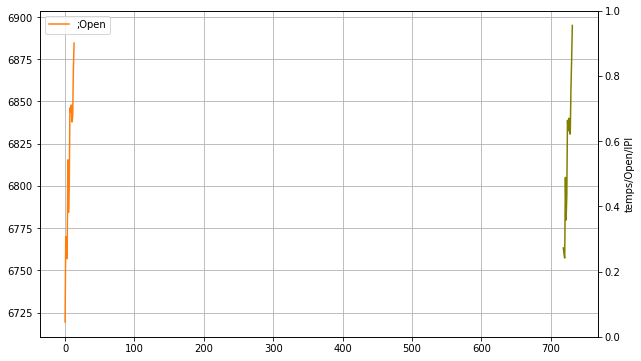

In [23]:
# plot
fig, ax = plt.subplots(figsize=(10, 6))
axb = ax.twinx()
ax.grid(True)
ax.plot(predictions, color='tab:orange', label=';Open')
ax.legend(loc='upper left');
axb.set_ylabel('temps/Open/IPI')
ax.plot(test[:-1], color='olive', label=';Open')
